In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

Pressure-Entropy Test
======

This test considers a uniformly-spaced set of particles, with a different energy/adiabat on two sides of a boundary. We then go on to show that there is a significant difference between the pressure reported by Pressure-Entropy and Traditional SPH.

In [2]:
from sphtests import PressureEntropyData
import numpy as np
import matplotlib.pyplot as plt

First, we'll set up the positions in a similar way:

In [3]:
diff_right = 0.0

positions_left = [x/10. for x in range(70, 250)]
positions_right = [x/10. for x in range(250, 430)]
positions = positions_left + positions_right

Now we must consider the energies. This is fairly simple due to the way that we set up the positions:

In [4]:
energies_left = [1.0] * len(positions_left)
energies_right = [10.0] * len(positions_right)
energies = energies_left + energies_right

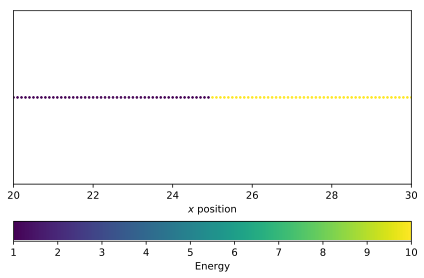

In [5]:
plt.scatter(positions, [0]*len(positions), c=energies, s=3)
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.colorbar(orientation="horizontal", label="Energy")
plt.gca().axes.yaxis.set_visible(False)
plt.tight_layout()

Looks good! Now we can pass these to our SPH stuff:

(note that $\eta = 5$ is equivalent to 20 neighbors in 1D).

In [6]:
from sphtests.sph import gaussian_kernel as kernel
data = PressureEntropyData(positions, energies, eta=1.238, kernel=kernel)

Grabbing the GadgetData object
Calculating smoothing lengths
Calculating densities
Calculating pressures
Starting Pressure-Entropy calculation
Minimising to find values of A
Difference: 1.0711134833216267
Difference: 0.06259506324397082
Difference: 0.0043152372725382
Difference: 0.0004187818915878383
Difference: 4.301018621710728e-05
Difference: 4.642284900741034e-06
Difference: 5.151226850352852e-07
Difference: 5.7554705112927707e-08
Calculating smoothed pressures
Calculating smoothed densities


Text(0.5,1,'Density Distribution')

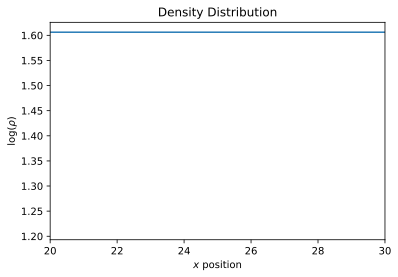

In [7]:
plt.plot(data.gadget.positions, np.log(data.gadget.densities))
plt.xlim(20, 30)
plt.ylabel(r"log($\rho$)")
plt.xlabel("$x$ position")
plt.title("Density Distribution")

Text(0.5,1,'GADGET Pressure Distribution')

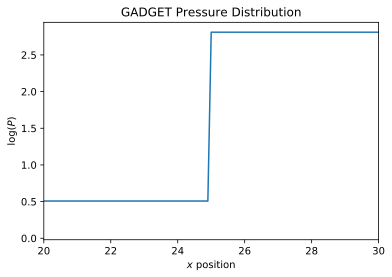

In [8]:
plt.plot(data.gadget.positions, np.log(data.gadget.pressures))
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.ylabel("log($P$)")
plt.title("GADGET Pressure Distribution")

Text(0.5,1,'Internal Energy Distribution')

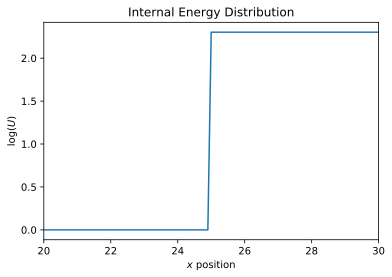

In [9]:
plt.plot(data.gadget.positions, np.log(data.gadget.energies))
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.ylabel("log($U$)")
plt.title("Internal Energy Distribution")

Text(0.5,1,'Smoothing Length')

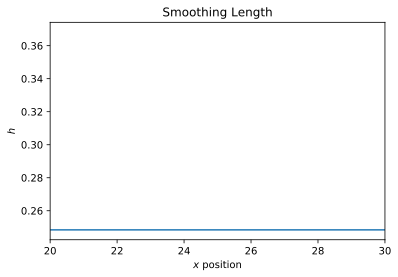

In [10]:
plt.plot(data.gadget.positions, data.gadget.smoothing_lengths)
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.ylabel("$h$")
plt.title("Smoothing Length")

Text(0.5,1,'Adiabat')

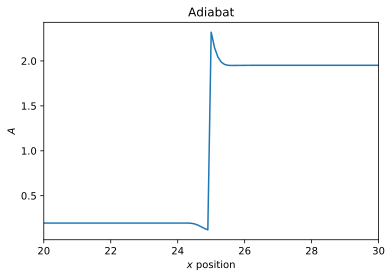

In [11]:
plt.plot(data.gadget.positions, data.adiabats)
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.ylabel("$A$")
plt.title("Adiabat")

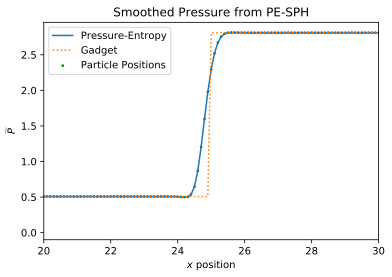

In [12]:
plt.scatter(data.gadget.positions, np.log(data.smoothed_pressures), s=3, c="green", label="Particle Positions")
plt.plot(data.gadget.positions, np.log(data.smoothed_pressures), label="Pressure-Entropy")
plt.plot(data.gadget.positions, np.log(data.gadget.pressures), ls='dotted', label="Gadget")
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.ylabel("$\widetilde{P}$")
plt.title("Smoothed Pressure from PE-SPH")
plt.legend()

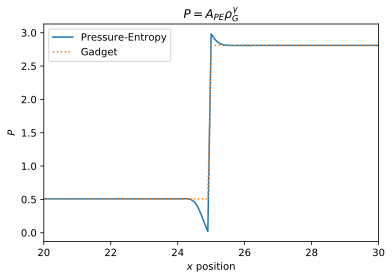

In [13]:
pressures = [A * rho**(4/3) for A, rho in zip(data.adiabats, data.gadget.densities)]
plt.plot(data.gadget.positions, np.log(pressures), label="Pressure-Entropy")
plt.plot(data.gadget.positions, np.log(data.gadget.pressures), ls='dotted', label="Gadget")
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.ylabel("$P$")
plt.title(r"$P = A_{PE} \rho_G^\gamma$")
plt.legend()

In [14]:
difference = [x - y for x, y in zip(data.gadget.pressures, pressures)]

Text(0.5,1,'Pressure difference, Unsmoothed PE vs GADGET')

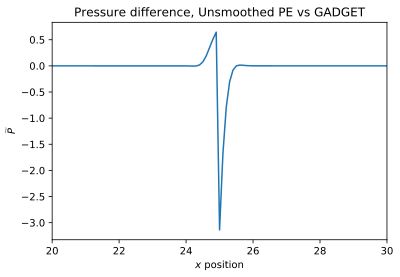

In [15]:
plt.plot(data.gadget.positions, difference)
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.ylabel("$\widetilde{P}$")
plt.title("Pressure difference, Unsmoothed PE vs GADGET")